In [2]:
import os
from transformers import AutoTokenizer
import datasets
import numpy as np
import tqdm
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
len(os.listdir("/cognitive_comp/common_data/big_corpus/book_zlib/chinese_all_txt/"))

54562

In [17]:
def count_tokens(path, tokenizer):
    with open(path, 'r') as file:
        file = file.readlines()
    if len(file) == 0: 
        return 0
    tokens = tokenizer(file).input_ids
    ctr = 0
    for each in tokens:
        ctr += len(each)
    return ctr

In [18]:
folder = "/cognitive_comp/common_data/big_corpus/book_zlib/chinese_all_txt/"
files = os.listdir(folder)
tokenizer = AutoTokenizer.from_pretrained("01-ai/Yi-34B")

tokens_ctr = []
empty_books = []
for file in tqdm.tqdm(files):
    try:
        ctr = count_tokens(os.path.join(folder, file), tokenizer)
        if ctr:
            tokens_ctr.append(ctr)
        else:
            empty_books.append(file)
    except:
        print(file)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54562/54562 [3:50:37<00:00,  3.94it/s]


In [22]:
f = 'books_tokens.txt'
f = open(f, 'a')
pointer = 0
for name in files:
    if name in empty_books:
        f.write(f"{os.path.join(folder, name)} {0}\n")
    else:
        f.write(f"{os.path.join(folder, name)} {tokens_ctr[pointer]}\n")
        pointer += 1
f.close()

In [68]:
np_tokens_ctr = np.array(tokens_ctr)
np_tokens_ctr.max(), np_tokens_ctr.min(), np_tokens_ctr.mean()

(32624306, 2, 196941.8946434303)

In [91]:
for thres in [0, 1000, 5000, 1e4, 1e5, 1e6, 1e7]:
    subset = np_tokens_ctr[np_tokens_ctr > thres]
    print(f"Books over {thres} tokens: {len(subset)} books, total tokens {subset.sum()/1e9:.2f}B, tokens mean {subset.mean():.0f}, tokens std {subset.std():.0f}, tokens min {subset.min()}, tokens max {subset.max()}")

Books over 0 tokens: 52963 books, total tokens 10.43B, tokens mean 196942, tokens std 668116, tokens min 2, tokens max 32624306
Books over 1000 tokens: 51180 books, total tokens 10.43B, tokens mean 203796, tokens std 678627, tokens min 1004, tokens max 32624306
Books over 5000 tokens: 49728 books, total tokens 10.43B, tokens mean 209668, tokens std 687580, tokens min 5001, tokens max 32624306
Books over 10000.0 tokens: 48773 books, total tokens 10.42B, tokens mean 213630, tokens std 693690, tokens min 10009, tokens max 32624306
Books over 100000.0 tokens: 22022 books, total tokens 8.95B, tokens mean 406446, tokens std 998622, tokens min 100002, tokens max 32624306
Books over 1000000.0 tokens: 1579 books, total tokens 4.18B, tokens mean 2645954, tokens std 2850691, tokens min 1000155, tokens max 32624306
Books over 10000000.0 tokens: 41 books, total tokens 0.67B, tokens mean 16409729, tokens std 5818338, tokens min 10080096, tokens max 32624306


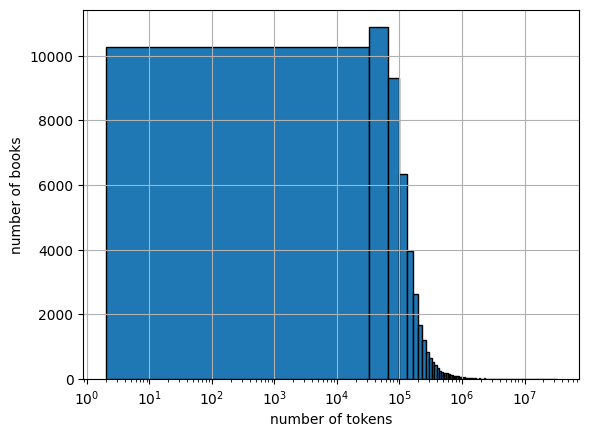

In [92]:
plt.hist(tokens_ctr, bins=1000, edgecolor='black')
plt.xscale('log')
plt.xlabel('number of tokens')
plt.ylabel('number of books')
plt.grid()
plt.show()

In [106]:
folder = "/cognitive_comp/common_data/big_corpus/book_zlib/chinese_all_txt/"
files = os.listdir(folder)
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen-72B", trust_remote_code=True)

tokens_ctr = []
empty_books = []
save_file = open("books_tokens_qwen.txt", 'a')

for idx, file in enumerate(tqdm.tqdm(files)):
    try:
        ctr = count_tokens(os.path.join(folder, file), tokenizer)
        if ctr:
            tokens_ctr.append(ctr)
        else:
            empty_books.append(file)
        save_file.write(f"{idx} {os.path.join(folder, file)} {ctr}\n")
    except:
        save_file.close()
        print(file)
        save_file = open("books_tokens_qwen.txt", 'a')

save_file.close()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54562/54562 [5:58:14<00:00,  2.54it/s]


In [108]:
len(tokens_ctr), len(empty_books), len(files)

(52963, 1599, 54562)

In [111]:
np_tokens_ctr = np.array(tokens_ctr)
np_tokens_ctr.max(), np_tokens_ctr.min(), np_tokens_ctr.mean()

(29372481, 2, 190227.27949700734)

In [112]:
for thres in [0, 1000, 5000, 1e4, 1e5, 1e6, 1e7]:
    subset = np_tokens_ctr[np_tokens_ctr > thres]
    print(f"Books over {thres} tokens: {len(subset)} books, total tokens {subset.sum()/1e9:.2f}B, tokens mean {subset.mean():.0f}, tokens std {subset.std():.0f}, tokens min {subset.min()}, tokens max {subset.max()}")

Books over 0 tokens: 52963 books, total tokens 10.08B, tokens mean 190227, tokens std 629614, tokens min 2, tokens max 29372481
Books over 1000 tokens: 51100 books, total tokens 10.07B, tokens mean 197155, tokens std 639923, tokens min 1002, tokens max 29372481
Books over 5000 tokens: 49693 books, total tokens 10.07B, tokens mean 202661, tokens std 648070, tokens min 5016, tokens max 29372481
Books over 10000.0 tokens: 48724 books, total tokens 10.06B, tokens mean 206546, tokens std 653891, tokens min 10002, tokens max 29372481
Books over 100000.0 tokens: 21498 books, total tokens 8.58B, tokens mean 398894, tokens std 949798, tokens min 100007, tokens max 29372481
Books over 1000000.0 tokens: 1520 books, total tokens 3.93B, tokens mean 2587197, tokens std 2687615, tokens min 1001561, tokens max 29372481
Books over 10000000.0 tokens: 37 books, total tokens 0.59B, tokens mean 15950118, tokens std 5133263, tokens min 10427488, tokens max 29372481


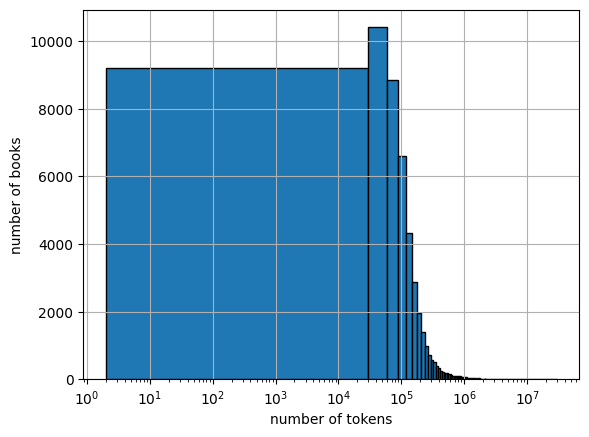

In [113]:
plt.hist(tokens_ctr, bins=1000, edgecolor='black')
plt.xscale('log')
plt.xlabel('number of tokens')
plt.ylabel('number of books')
plt.grid()
plt.show()

In [117]:
qwen_res = open('./books_tokens_qwen.txt', 'r')
qwen_res = qwen_res.readlines()
qwen_res = [int(each.strip().split()[-1]) for each in qwen_res]

yi_res = open('./books_tokens_yi_new.txt', 'r')
yi_res = yi_res.readlines()
yi_res = [int(each.strip().split()[-1]) for each in yi_res]

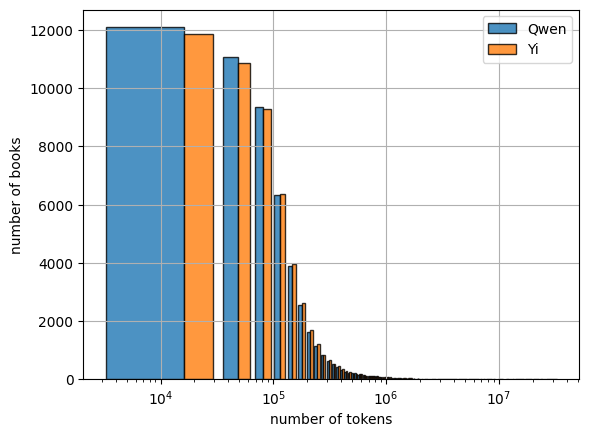

In [123]:
plt.hist([qwen_res, yi_res], alpha=0.8, bins=1000, edgecolor='black', label=['Qwen', 'Yi'])

plt.xscale('log')
plt.xlabel('number of tokens')
plt.ylabel('number of books')
plt.legend()
plt.grid()
plt.show()